In [1]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [3]:
import pandas as pd

weather = pd.read_csv(path_data+'weather_03.csv', usecols=[1,2,3,4])
weather.head()

,MinTemp,MaxTemp,Humidity9am,Humidity3pm
0,20.8,30.1,83.0,58.0
1,14.0,19.3,72.0,68.0
2,23.7,31.2,59.0,60.0
3,0.1,19.6,70.0,35.0
4,11.0,19.9,68.0,61.0


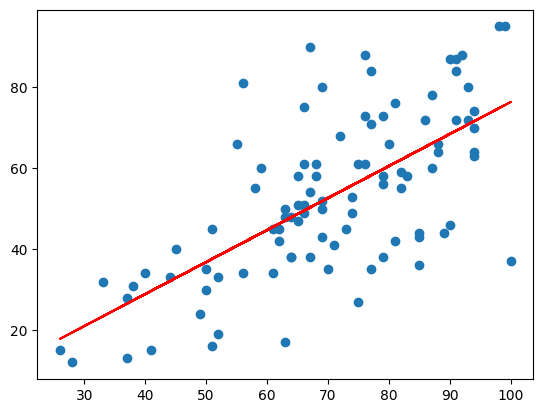

[0.79086669]


'\nYou can see that despite some noise in the plot, we have a decent looking fit here using Humidity9am to predict the dependent variable Humidity3pm with a linear model. Furthermore, take another look at our coefficient. This means that for every 1 unit of humidity in the morning, we can expect about 0.80 units of humidity in the afternoon. More practically, this information tells us that humidity drops about 20% from morning to afternoon!\n'

In [4]:
# exercise 01

"""
Linear regression

In this exercise, you'll implement a simple linear regression model. Get ready to make predictions, visualize the model fit, and analyze the formula used to generate your fit.

By now, you're probably comfortable with the weather dataset that we'll be using. Your dependent variable will be the Humidity3pm feature. All of the standard packages have been imported for you.
"""

# Instructions

"""

    Assign a LinearRegression() object to the lm variable; fit your model on the next line.
---

    Assign the predictions from your model to preds using the predict() function; print the list once you have it.
---

    Visualize the relationship between X and y with the scatter() function, then plot your predictions on top using the plot() function.

"""

# solution

from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
import numpy as np
X = np.array(weather['Humidity9am']).reshape(-1,1)
y = weather['Humidity3pm']

# Create and fit your linear regression model
lm = LinearRegression()
lm.fit(X, y)

# Assign and print predictions
preds = lm.predict(X)

# Plot your fit to visualize your model
plt.scatter(X, y)
plt.plot(X, preds, color='red')
plt.show()

# Assign and print coefficient 
coef = lm.coef_
print(coef)

#----------------------------------#

# Conclusion

"""
You can see that despite some noise in the plot, we have a decent looking fit here using Humidity9am to predict the dependent variable Humidity3pm with a linear model. Furthermore, take another look at our coefficient. This means that for every 1 unit of humidity in the morning, we can expect about 0.80 units of humidity in the afternoon. More practically, this information tells us that humidity drops about 20% from morning to afternoon!
"""

In [20]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import normalize
weather = pd.read_csv(path_data+'weather_full.csv').iloc[:,1:]

X_train, X_test, y_train, y_test = tts(weather.iloc[:,6:8], weather.iloc[:,-1], test_size=0.25)

X_train = normalize(X_train, norm='l1')
X_test = normalize(X_test, norm='l1')

In [21]:
# exercise 02

"""
Logistic regression

Let's move on to logistic regression. You'll be working with the same weather dataset again, but the goal here is to predict if it's going to rain tomorrow. We've gone ahead and created your train and test sets for you. Your dependent variables are the Humidity9am and Humidity3pm features.

It's also worth noting that the dataset has already been normalized in order to ensure that we can interpret the coefficients later on. This is always good to bring up during your interview when talking about regression for inference.
(https://en.wikipedia.org/wiki/Normalization_(statistics))
"""

# Instructions

"""

    Create and fit your logistic regression model using the X_train and y_train variables.
---

    Print the accuracy of your model using the score() function.
---

    Let's take a look at the coefficients of our model; what does this tell you?

"""

# solution

from sklearn.linear_model import LogisticRegression

# Create and fit your model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Compute and print the accuracy
acc = clf.score(X_test, y_test)
print(acc)

# Assign and print the coefficents
coefs = clf.coef_
print(coefs)

#----------------------------------#

# Conclusion

"""
Since our features were normalized beforehand, we can look at the magnitude of our coefficients to tell us the importance of each independent variable. Here you can see the the second variable, Humidity3pm was much more important to our outcome than humidity from that morning. This is intuitive since we are trying to predict the rain for tomorrow!
"""

0.8125
[[-1.91231645  1.91237935]]


'\nSince our features were normalized beforehand, we can look at the magnitude of our coefficients to tell us the importance of each independent variable. Here you can see the the second variable, Humidity3pm was much more important to our outcome than humidity from that morning. This is intuitive since we are trying to predict the rain for tomorrow!\n'

In [22]:
# exercise 03

"""
Regression evaluation

Let's revisit the linear regression model that you created with LinearRegression() and then trained with the fit() function a few exercises ago. Evaluate the performance your model, imported here as lm for you to call.

The weather data has been imported for you with the X and y variables as well, just like before. Let's get to calculating the R-squared, mean squared error, and mean absolute error values for the model.
"""

# Instructions

"""
Compute and print the R-squared score of our model using the score() function.
---
Compute and print mean squared error using the mean_squared_error() function.
---
Adapt your code to compute and print the mean absolute error this time using the mean_absolute_error() function.
"""

# solution

# R-squared score
r2 = lm.score(X, y)
print(r2)

#----------------------------------#

# Mean squared error
from sklearn.metrics import mean_squared_error
preds = lm.predict(X)
mse = mean_squared_error(y, preds)
print(mse)

#----------------------------------#

# Mean absolute error
from sklearn.metrics import mean_absolute_error
preds = lm.predict(X)
mae = mean_absolute_error(y, preds)
print(mae)

#----------------------------------#

# Conclusion

"""
Good job! Note that our R-squared value tells us the percentage of the variance of y that X is responsible for. Which error metric would you recommend for this dataset? If you remember from when you plotted your model fit, there aren't too many outliers, so mean squared error would be a good choice to go with! When interviewing, make sure you have sound reasoning to back up your choice on questions like this.
"""

0.4466200635307638
226.12721831681654
11.522404665934568


"\nGood job! Note that our R-squared value tells us the percentage of the variance of y that X is responsible for. Which error metric would you recommend for this dataset? If you remember from when you plotted your model fit, there aren't too many outliers, so mean squared error would be a good choice to go with! When interviewing, make sure you have sound reasoning to back up your choice on questions like this.\n"

In [23]:
# exercise 04

"""
Classification evaluation

Moving forward with evaluation metrics, this time you'll evaluate our logistic regression model from before with the goal of predicting the binary RainTomorrow feature using humidity.

We have gone ahead and imported the model as clf and the same test sets assigned to the X_test and y_test variables. Generate and analyze the confusion matrix and then compute both precision and recall before making a conclusion.
"""

# Instructions

"""
Generate and print out the confusion matrix for your model; identify the Type I and Type II errors.
---
Compute and print the precision of your model; can you explain why precision is helpful in this context?
---
Adapt your code to compute and print the recall of your model; what do you conclude?
"""

# solution

# Generate and output the confusion matrix
from sklearn.metrics import confusion_matrix
preds = clf.predict(X_test)
matrix = confusion_matrix(y_test, preds)
print(matrix)

#----------------------------------#

# Compute and print the precision
from sklearn.metrics import precision_score
preds = clf.predict(X_test)
precision = precision_score(y_test, preds)
print(precision)

#----------------------------------#

# Compute and print the recall
from sklearn.metrics import recall_score
preds = clf.predict(X_test)
recall = recall_score(y_test, preds)
print(recall)

#----------------------------------#

# Conclusion

"""
Good work! You can see here that the precision of our rain prediction model was quite high, meaning that we didn't make too many Type I errors. However, there were plenty of Type II errors shown in the bottom-left quadrant of the confusion matrix. This is indicated further by the low recall score, meaning that there were plenty of rainy days that we missed out on. Think a little about the context and what method you would choose to optimize for!
"""

[[195   0]
 [ 45   0]]
0.0
0.0


/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


"\nGood work! You can see here that the precision of our rain prediction model was quite high, meaning that we didn't make too many Type I errors. However, there were plenty of Type II errors shown in the bottom-left quadrant of the confusion matrix. This is indicated further by the low recall score, meaning that there were plenty of rainy days that we missed out on. Think a little about the context and what method you would choose to optimize for!\n"

In [32]:
# exercise 05

"""
Handling null values

Let's practice handling null values with our laptops dataset that we worked with previously. You will identify rows with null values, and then try out several techniques to address this problem.

Remember that the laptops data and the pandas package have been imported for you already.
"""

# Instructions

"""
Identify and print the rows with null values by slicing your DataFrame with the isnull() function.
---
Impute 0 for missing prices using the fillna() function; print the DataFrame head and note index 1 and 2 were null.
---
Adapt your code to impute the median price instead; once again print the first five rows to confirm.
---
Drop all the rows with null values using the dropna() function; make sure you pass inplace=True as a parameter.
"""

# solution

# Identify and print the the rows with null values
laptops = pd.read_csv(path_data+'laptops_na.csv', usecols=[3])
nulls = laptops[laptops.isnull().any(axis=1)]
print(nulls)

#----------------------------------#

# Impute constant value 0 and print the head
laptops = pd.read_csv(path_data+'laptops_na.csv', usecols=[3])
laptops.fillna(0, inplace=True)
print(laptops.head())

#----------------------------------#

# Impute median price and print the head
laptops = pd.read_csv(path_data+'laptops_na.csv', usecols=[3])
laptops.fillna(laptops.median(), inplace=True)
print(laptops.head())

#----------------------------------#

# Drop each row with a null value and print the head
laptops = pd.read_csv(path_data+'laptops_na.csv', usecols=[3])
laptops.dropna(inplace=True)
print(laptops.head())

#----------------------------------#

# Conclusion

"""
Nice job! Notice that the observations at index 1 and 2 are gone now. The technique that you decide on should be entirely dependent on the context of the situation. Interviewers may be curious as to how you think about this problem, as it comes up often on the job. Are you quick to throw away information or are you more inclined to patch up any null values? There's usually no one right answer, but be sure to explain your thought process!
"""

     Price
1      NaN
2      NaN
5      NaN
10     NaN
86     NaN
115    NaN
165    NaN
207    NaN
   Price
0  400.0
1    0.0
2    0.0
3  191.9
4  199.0
   Price
0  400.0
1  812.0
2  812.0
3  191.9
4  199.0
    Price
0  400.00
3  191.90
4  199.00
6  389.00
7  522.99


"\nNice job! Notice that the observations at index 1 and 2 are gone now. The technique that you decide on should be entirely dependent on the context of the situation. Interviewers may be curious as to how you think about this problem, as it comes up often on the job. Are you quick to throw away information or are you more inclined to patch up any null values? There's usually no one right answer, but be sure to explain your thought process!\n"

In [33]:
# exercise 06

"""
Identifying outliers

Let's keep at it with our laptops dataset and tackle some outliers hiding away. In this exercise, we'll stick to the first technique we discussed in the slides using standard deviations to identify extreme values, since this method is more common in practice.

You'll compute the descriptive statistics and outlier boundaries, and then identify the rows with them before dropping them from the dataset. You'll be working primarily with the Price column here.
"""

# Instructions

"""

    Calculate the mean and standard deviation of the Price column.
---

    Compute and print the upper and lower boundaries for acceptable values.
---

    Identify the rows with outliers; print outliers when you have it.
---

    Drop the rows from our DataFrame; would you recommend this?

"""

# solution
laptops = pd.read_csv(path_data+'laptops_na.csv', usecols=[1,2,3])
# Calculate the mean and std
mean, std = laptops['Price'].mean(), laptops['Price'].std()

# Compute and print the upper and lower threshold
cut_off = 3 * std
lower, upper = mean - cut_off, mean + cut_off
print(lower, 'to', upper)

# Identify and print rows with outliers
outliers = laptops[(laptops['Price'] > upper) | 
                   (laptops['Price'] < lower)]
print(outliers)

# Drop the rows from the dataset
laptops = laptops[(laptops['Price'] <= upper) | 
                  (laptops['Price'] >= lower)]

#----------------------------------#

# Conclusion

"""
Good job! In this scenario, dropping the outliers was likely the right move since the values were unthinkable for laptops prices. This implies that there was some mistake in data entry or data collection. With that being said, this won't always be the best path forward. It's important to understand why you got the outliers that you did and if they provide valuable information before you throw them out.
"""

-1653.739411931298 to 3653.2920365160157
    Company             Product    Price
65     Asus   ROG G703VI-E5062T   3890.0
224    Asus  Rog GL753VD-GC082T  11369.9
262    Asus          ROG G701VO   3975.0


"\nGood job! In this scenario, dropping the outliers was likely the right move since the values were unthinkable for laptops prices. This implies that there was some mistake in data entry or data collection. With that being said, this won't always be the best path forward. It's important to understand why you got the outliers that you did and if they provide valuable information before you throw them out.\n"

# Test and training error

In terms of the bias-variance tradeoff, which of the following is substantially more harmful to the test error than the training error?

### Possible Answers


    Bias
    
    
    Variance {Answer}
    
    
    Loss
    
    
    Cost
    
**Correct! High variance results in overfitting to your training set. You'll see strong performance at first, until you apply your model to your test set, where it will fail to generalize and likely struggle.**

In [36]:
preds2 = np.array([15.53525167, 15.53534977, 15.55148697, 15.72947344, 15.82907861,17.73832012, 19.20364572, 21.4816421 , 22.37381179, 24.95534003,
       28.91800842, 28.68313221, 28.2327866 , 26.5900021 , 27.16358955,
       31.52913078, 28.14037689, 22.11067535, 29.29889768])

X = np.array([ 8.6, 14.2, 15.1, 17.5, 16.2,  5.8, 20.3,  2.5, 15.4, 22.2, 30.4,
       11. , 21.7, 25.5, 13.4, 25.2, 10.6, 26.7, 20.5])

y = np.array([11.5, 17. , 22.5, 24.3, 27.4, 18.8, 32. ,  8.6, 30.9, 30.7, 29.3,
       17.8, 25.6, 33.9, 19.2, 25.3, 15. , 21.7, 23.1])

preds = np.array([12.45724842, 14.82960776, 16.8425187 , 18.28031224, 18.56787094,
       20.29322318, 20.8683406 , 21.51534769, 21.73101672, 22.30613413,
       23.24069993, 25.25361088, 25.39739023, 26.26006635, 26.61951473,
       28.77620503, 28.99187406, 29.85455018, 32.51446822])

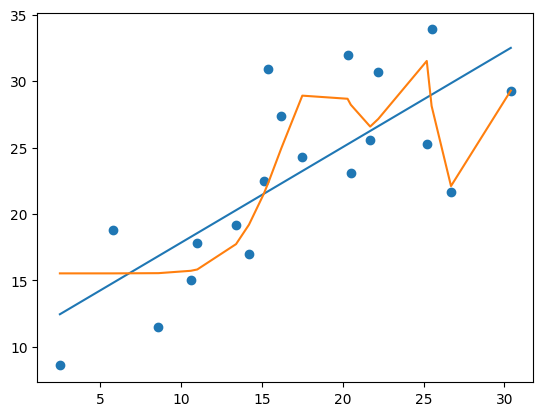

"\nGreat job! This plot does an excellent job of showing both high-bias and high-variance models. Your original simple linear regression fit (the straight blue line) has higher bias, while the higher-order polynomial model is much more flexible to new observations and therefore has higher variance. In most cases, you'll find that the best result comes somewhere in between these examples - hence the tradeoff!\n"

In [37]:
# exercise 07

"""
Visualizing the tradeoff

We know that the bias-variance tradeoff serves as the basis for dealing with issues like overfitting and underfitting in machine learning.

In this final exercise, you'll revisit our weather dataset one last time by visualizing the difference between high bias and high variance models using the already imported preds and preds2 variables.

As a reminder, we are using the Temp9am feature to predict our dependent variable, the Temp3pm feature. The usual packages have been imported.
"""

# Instructions

"""

    Visualize the relationship between the imported X and y variables using the scatter() function.
---

    Add the simple linear regression predictions saved as preds to your scatter plot; this is the model you created earlier in the chapter.
---

    Similarly, add the higher-complexity predictions saved as preds2 to your scatter plot; observe the difference between the two fits.

"""

# solution

# Use X and y to create a scatterplot
plt.scatter(X, y)

# Add your model predictions to the scatter plot 
plt.plot(np.sort(X), preds)

# Add the higher-complexity model predictions as well
plt.plot(np.sort(X), preds2)
plt.show()

#----------------------------------#

# Conclusion

"""
Great job! This plot does an excellent job of showing both high-bias and high-variance models. Your original simple linear regression fit (the straight blue line) has higher bias, while the higher-order polynomial model is much more flexible to new observations and therefore has higher variance. In most cases, you'll find that the best result comes somewhere in between these examples - hence the tradeoff!
"""